In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import sys
import os
import umap
from sklearn.metrics import silhouette_score

sys.path.append(os.path.abspath('..')) 

from utils.preproc_utils import *
from utils.plot_utils import *
from utils.modeling_utils import *


In [2]:
sys.path.append(os.path.abspath('..')) 
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/processed/'))

latent_rep_path = os.path.join(base_dir, 'latent_representation.csv')
latent_rep = pd.read_csv(latent_rep_path, index_col='customer_id')

In [3]:
scaler = MinMaxScaler()
latent_rep_scaled = pd.DataFrame(scaler.fit_transform(latent_rep), columns=latent_rep.columns, index=latent_rep.index)

In [4]:
latent_rep_scaled.head(3)

,latent_0,latent_1,latent_2,latent_3
customer_id,,,,
26709,0.351277,0.455748,0.601716,0.345119
47768,0.357316,0.327743,0.245954,0.261178
29757,0.550426,0.341741,0.309953,0.229338


In [17]:
db = DBSCAN(eps=0.1, min_samples=15)

# Fit the model to your data
db.fit(latent_rep_scaled)

latent_rep_scaled['cluster'] = db.labels_ 

# Identify outliers
outliers = latent_rep_scaled[db.labels_ == -1]

In [21]:
len(latent_rep)

22732

c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


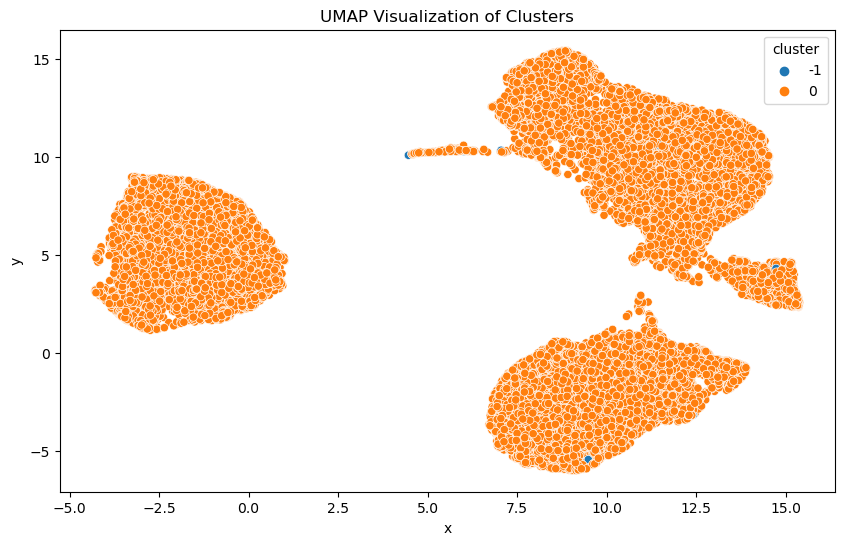

In [18]:
plot_umap_clusters(latent_rep_scaled)

In [16]:
# Define the parameter space
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = [5, 10, 15, 20, 25]

# Initialize the best parameters and the best score
best_eps = None
best_min_samples = None
best_score = -1

# Perform Grid Search
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db.fit(latent_rep_scaled)
        labels = db.labels_
        
        # Skip silhouette score calculation if there is only one unique label
        if len(np.unique(labels)) > 1:
            score = silhouette_score(latent_rep_scaled, labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

Best eps: 0.1
Best min_samples: 15


In [9]:
from sklearn.ensemble import IsolationForest

# Create an instance of Isolation Forest
clf = IsolationForest(contamination=0.01)

# Fit the model to your data
clf.fit(latent_rep_scaled)

# Predict the outliers
outliers = clf.predict(latent_rep_scaled)

# Add the cluster column to the dataframe
latent_rep_scaled['cluster'] = outliers

c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [6]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
latent_rep_scaled['cluster'].value_counts()

cluster
 1    22504
-1      228
Name: count, dtype: int64

c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


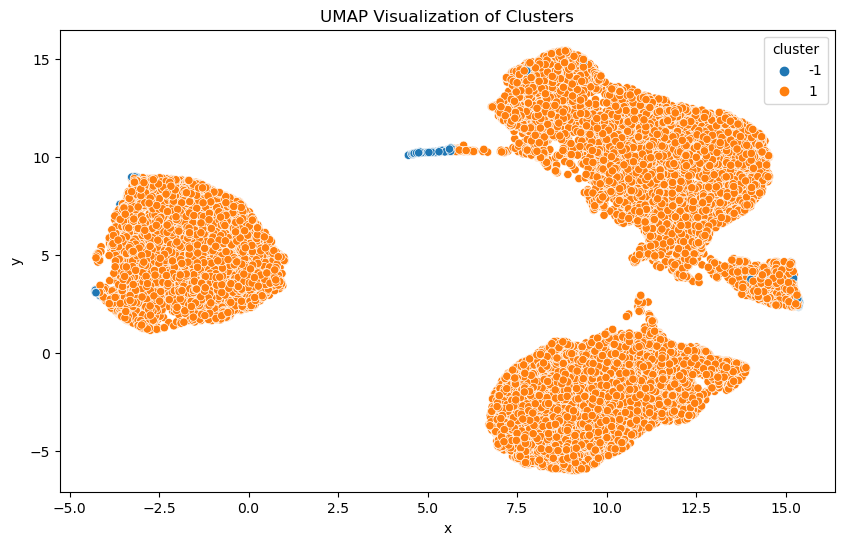

In [12]:
plot_umap_clusters(latent_rep_scaled)

In [14]:
latent_rep_scaled = latent_rep_scaled[latent_rep_scaled['cluster'] == 1]


In [16]:
latent_rep_scaled.drop('cluster', axis=1, inplace=True) 

C:\Users\Francisco Batista\AppData\Local\Temp\ipykernel_22592\1600126042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latent_rep_scaled.drop('cluster', axis=1, inplace=True)


In [17]:
latent_rep_scaled

,latent_0,latent_1,latent_2,latent_3
customer_id,,,,
26709,0.351277,0.455748,0.601716,0.345119
47768,0.357316,0.327743,0.245954,0.261178
29757,0.550426,0.341741,0.309953,0.229338
42493,0.391510,0.872132,0.837180,0.696681
27655,0.206095,0.403794,0.621290,0.443428
...,...,...,...,...
22316,0.271850,0.241628,0.351646,0.420662
46617,0.358416,0.108119,0.549362,0.355993
5477,0.301920,0.694391,0.788505,0.615984


c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

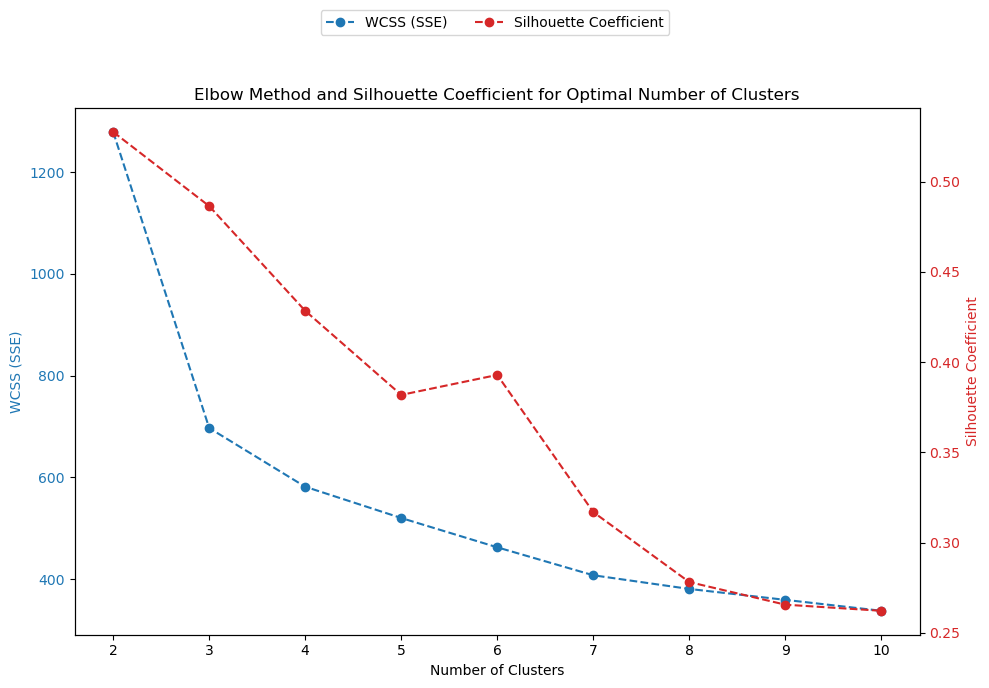

([1278.9954677734029,
  696.7515797528719,
  581.3205469053909,
  519.8375417685442,
  462.2060383129886,
  407.2374019764919,
  380.34190682945075,
  358.8907767363979,
  337.40152719322884],
 [0.5275326658547886,
  0.4864408710850529,
  0.4284255101133758,
  0.38184229097349487,
  0.3928999821324944,
  0.3169149471525401,
  0.27813945418546915,
  0.26561434794087274,
  0.2622302866350387])

In [18]:
plot_elbow_and_silhouette(latent_rep_scaled)

In [24]:
latent_rep_scaled_nigga = append_kmeans_clusters(latent_rep_scaled, 3)

c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\Francisco Batista\.conda\envs\uni\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


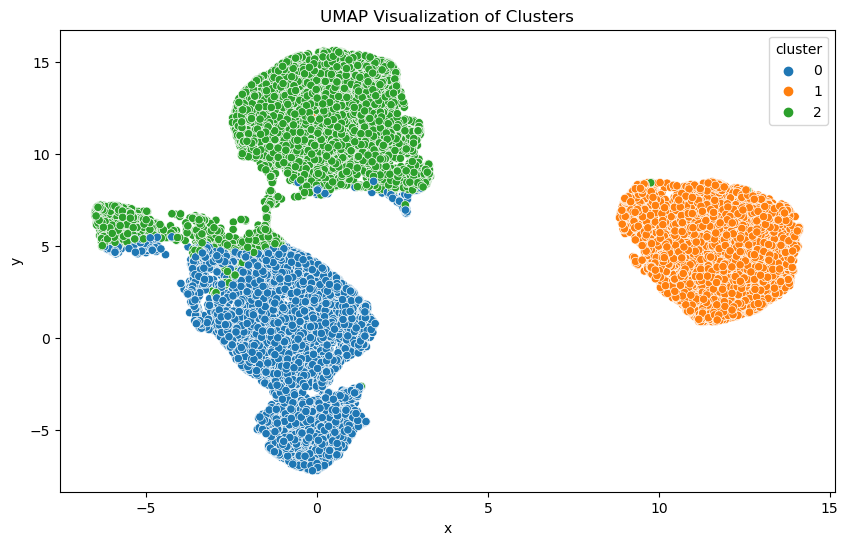

In [25]:
plot_umap_clusters(latent_rep_scaled_nigga)